# How Local Food Environment Impact Food Choice and Diet Quality?
## How expenditure on fastfood and full service restaurant varies among state with high/low food insecurity rate?

## Pitch
I've always interested in the topic of food desert, neighbood where people don't have proper access to affordable and good quality fresh food. At first, I was trying to only focus on NYC, and to see how severe the food environment is for different boroughs. However, the database that I finally managed to get is about the food environment of the whole US. I tried to narrow it down to the 5 boroughs, but unfortunately, the Manhattan population that has low access to grocery store is only 2 people. I don't know if there is a data error or methodology issue, so clearly I cannot use the low-access indicator to measure the food environment of Manhattan because everything thing is within walk distance for almost everyone according to the 'suspicious' 2 people record. 

As a result, I shift my research from a micro to a macro perspective, i.e.the nationwide food environment severity and the correlation between local food environment and food choice and diet quality.

***Some Indicators that i will be using in my research:***

-  Household food insecurity rate (%, three-year average), 2013-15*	FOODINSEC_13_15

***I will first filter out the top 5 state with the highest food insecurity rate and 5 state with the lowest food insecurity rate and then conduct analysis based on the following indicators (county-level) from 3 major perspectives: Fast food expenditure, physical distance from grocery stores, and poverty rate (socioeconomic factor):***

-  Physical distance from grocery store: Population, low access to store (%), 2015	PCT_LACCESS_POP15

---------
***For the fast food expenditure analysis, I want to first compare the expenditure on fast food and full service restaurant per capita for each state, and then map the change in number of the two kind of restaurants in those states from 2009 to 2014***


***Hypothesis: fast food restaurants tend to open more stores in food insecure neighboorhood/county/state.***

-  Fast-food restaurants, 2009	FFR09
-  Fast-food restaurants, 2014	FFR14
-  Full-service restaurants, 2009	FSR09
-  Full-service restaurants, 2014	FSR14
-  Expenditures per capita, fast food, 2007	PC_FFRSALES07
- Expenditures per capita, fast food, 2012	PC_FFRSALES12
-  Expenditures per capita, restaurants, 2007	PC_FSRSALES07
-  Expenditures per capita, restaurants, 2012	PC_FSRSALES12
-----------
-  Poverty rate, 2015	POVRATE15








## Indicators and definitions:
1.  Household food insecurity (percent, 3-year average):


***Definition: Prevalence of household-level food insecurity by State. Food-insecure households were unable, at times during the year, to provide adequate food for one or more household members because the household lacked money and other resources for food.***


Data sources: ERS estimates using 3 years of data from the Current Population Survey Food Security Supplement, as reported in Table 5 in the referenced report, Household Food Security in the United States in 2015 (September 2016). The food security survey asks one adult respondent in each household a series of questions about experiences and behaviors that indicate food insecurity. The food security status of the household was assessed based on the number of food-insecure conditions reported (such as being unable to afford balanced meals, cutting the size of meals because of too little money for food, or being hungry because of too little money for food). Note: margins of error are substantial for some States; comparisons between States should take into consideration margins of error published in the source report. (USDA)

2.PCT_LACCESS_POP15
***Definition: Number of people in a county living more than 1 mile from a supermarket or large grocery store if in an urban area, or more than 10 miles from a supermarket or large grocery store if in a rural area.
***

# Exploratory Steps:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline  

In [15]:
df = pd.read_excel('access_to_groceries.xlsx')

In [51]:
df.shape

NameError: name 'df' is not defined

In [5]:
df_ny = df[df.State == 'NY']

In [6]:
df_nyc = df_ny[df_ny.County.isin(['Bronx','Kings','Queens','New York','Richmond'])]


In [7]:
df.groupby('State')['LACCESS_POP15'].sum().sort_values(ascending = False).head()

State
TX    5.726930e+06
CA    4.323350e+06
FL    3.986500e+06
OH    2.636742e+06
PA    2.526792e+06
Name: LACCESS_POP15, dtype: float64

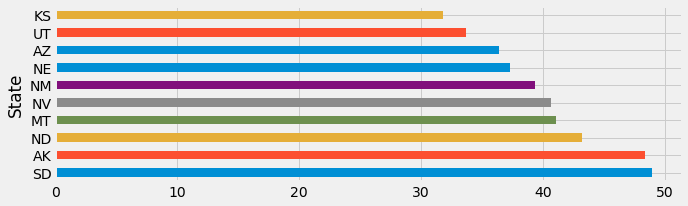

In [9]:
plt.style.use('fivethirtyeight')
df.groupby('State')['PCT_LACCESS_POP15'].mean().sort_values(ascending = False).head(10).plot(kind='barh',figsize = (10,3))


In [11]:
df_nyc_race=df_nyc[['County','LACCESS_POP15','LACCESS_WHITE15','LACCESS_BLACK15','LACCESS_HISP15',
       'LACCESS_NHASIAN15','LACCESS_NHNA15','LACCESS_NHPI15','LACCESS_MULTIR15']]


In [ ]:
# Data to plot
labels = 'WHITE','BLACK','HISPANIC','ASIAN','AMERICN INDIAN','HAWAIIAN OR PACIFIC ISLANDER','MULTIRACIAL'
sizes = ['LACCESS_WHITE15','LACCESS_BLACK15','LACCESS_HISP15',
       'LACCESS_NHASIAN15','LACCESS_NHNA15','LACCESS_NHPI15','LACCESS_MULTIR15']
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
# explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()



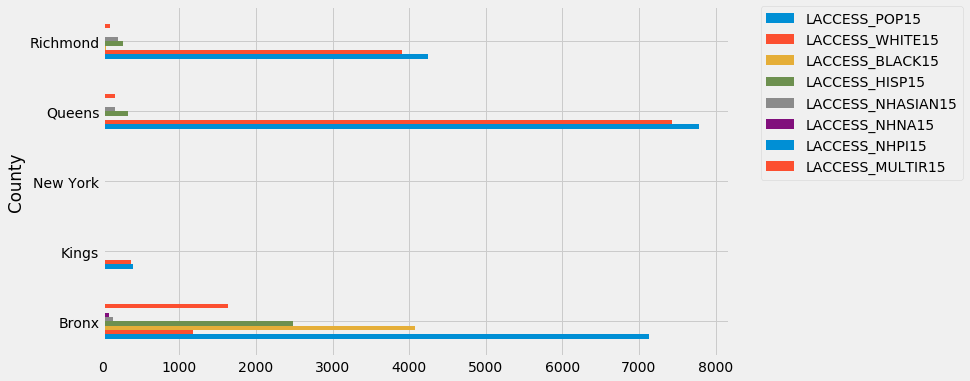

In [13]:
plt.style.use('fivethirtyeight')
# plt.rcdefaults()
df_nyc_race.plot(x='County',kind='barh', figsize = (10,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Combine four different tables

In [48]:
df_insecurity = pd.read_excel('insecurity.xlsx')
df_access = pd.read_excel('access_to_groceries.xlsx')
df_food = pd.read_excel('Restaurant.xlsx')
df_econ = pd.read_excel('socioeconomic.xlsx')
df_health = pd.read_excel('health.xlsx')

In [147]:
sheets = [df_insecurity,df_access,df_food,df_econ,df_health]
big_table = pd.concat(sheets,axis = 1,ignore_index=False)
big_table.head(10)

,FIPS,State,County,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,...,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,PCT_HSPA15,RECFAC09,RECFAC14,PCH_RECFAC_09_14,RECFACPTH09,RECFACPTH14,PCH_RECFACPTH_09_14
0,1001,AL,Autauga,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,13.0,31.5,34.1,25.4,4,5,25.000000,0.073889,0.090261,22.156783
1,1003,AL,Baldwin,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,10.4,26.2,27.4,25.4,18,25,38.888889,0.100331,0.124931,24.518392
2,1005,AL,Barbour,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,18.4,37.6,44.4,25.4,1,0,-100.000000,0.036157,0.000000,-100.000000
3,1007,AL,Bibb,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,14.8,32.3,40.3,25.4,1,1,0.000000,0.043590,0.044433,1.932818
4,1009,AL,Blount,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,14.1,31.9,34.6,25.4,3,3,0.000000,0.052319,0.051976,-0.654897
5,1011,AL,Bullock,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,19.6,37.8,43.0,25.4,0,0,0.000000,0.000000,0.000000,0.000000
6,1013,AL,Butler,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,17.7,36.8,36.3,25.4,0,1,NaN,0.000000,0.049271,NaN
7,1015,AL,Calhoun,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,14.9,33.5,32.2,25.4,7,7,0.000000,0.059140,0.060389,2.111011
8,1017,AL,Chambers,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,16.4,35.5,39.7,25.4,2,0,-100.000000,0.058167,0.000000,-100.000000
9,1019,AL,Cherokee,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,13.3,31.5,33.6,25.4,1,1,0.000000,0.038679,0.038407,-0.702846


In [150]:
big_table.to_csv('big_table.csv',index = False)

In [152]:
big_table = pd.read_csv('big_table.csv')
big_table.head()

,FIPS,State,County,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,...,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,PCT_HSPA15,RECFAC09,RECFAC14,PCH_RECFAC_09_14,RECFACPTH09,RECFACPTH14,PCH_RECFACPTH_09_14
0,1001,AL,Autauga,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,13.0,31.5,34.1,25.4,4,5,25.000000,0.073889,0.090261,22.156783
1,1003,AL,Baldwin,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,10.4,26.2,27.4,25.4,18,25,38.888889,0.100331,0.124931,24.518392
2,1005,AL,Barbour,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,18.4,37.6,44.4,25.4,1,0,-100.000000,0.036157,0.000000,-100.000000
3,1007,AL,Bibb,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,14.8,32.3,40.3,25.4,1,1,0.000000,0.043590,0.044433,1.932818
4,1009,AL,Blount,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,14.1,31.9,34.6,25.4,3,3,0.000000,0.052319,0.051976,-0.654897


In [77]:
state_fullname('TX')

'Texas'

In [ ]:
#convert state acronyms into full name
def state_fullname(row):
    states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
    abbr = row['State']
    full_name = states[abbr]
    return full_name

df = big_table.apply(state_fullname)

In [ ]:
result = pd.merge(df_insecurity,
                  df_food[['County','PC_FFRSALES07','PC_FFRSALES12','PC_FSRSALES07','PC_FSRSALES12','FFR09','FFR14','FSR09','FSR14',]],
                  df_econ[['County','MEDHHINC15','POVRATE15']],
                  df_health[['County','PCT_DIABETES_ADULTS08','PCT_DIABETES_ADULTS13','PCT_OBESE_ADULTS08','PCT_OBESE_ADULTS13']],
                  on='County')

In [3]:
df_insecurity.head()

,FIPS,State,County,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11
0,1001,AL,Autauga,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3
1,1003,AL,Baldwin,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3
2,1005,AL,Barbour,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3
3,1007,AL,Bibb,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3
4,1009,AL,Blount,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3


In [20]:
df_insecurity = df_insecurity[['FIPS','State','County','FOODINSEC_13_15']]
state_insecurity = df_insecurity.groupby('State').FOODINSEC_13_15.mean().reset_index()
high_insecure = state_insecurity.sort_values(by='FOODINSEC_13_15',ascending = False).head()
low_insecure = state_insecurity.sort_values(by='FOODINSEC_13_15',ascending = False).tail()





In [33]:
high_insecure
highinsec_state = high_insecure['State'].tolist()
highinsec_state

['MO', 'AZ', 'LA', 'AL', 'KY']

In [32]:
low_insecure
lowinsec_state = low_insecure['State'].tolist()
lowinsec_state

['MN', 'VT', 'ME', 'HI', 'NV']

In [377]:
color_dict = {
    'MO': '#f28f8b',
    'AZ': '#f28f8b',
    'LA': '#f28f8b',
    'AL': '#f28f8b',
    'KY': '#f28f8b',
    'NV': '#acd9e6',
    'HI': '#acd9e6',
    'ME': '#acd9e6',
    'VT': '#acd9e6',
    'MN': '#acd9e6',
}

bar_colors = [color_dict[name] for name in high_insecure.State]



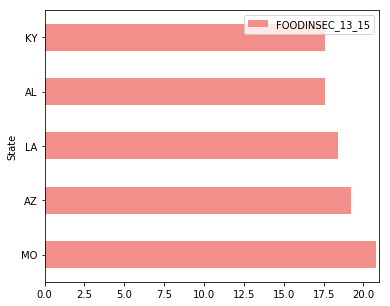

In [378]:
ax = high_insecure.plot(kind = 'barh', x = 'State',color = bar_colors,figsize=(6,5),width = 0.5)
ax.set_xlim((0, 21))
plt.savefig("high_insecure.pdf")

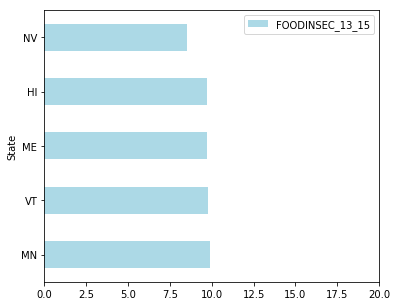

In [379]:
bar_colors = [color_dict[name] for name in low_insecure.State]
ax = low_insecure.plot(kind = 'barh', x = 'State',color = bar_colors, figsize=(6,5),width = 0.5)
ax.set_xlim((0, 20))
plt.savefig("low_insecure.pdf")

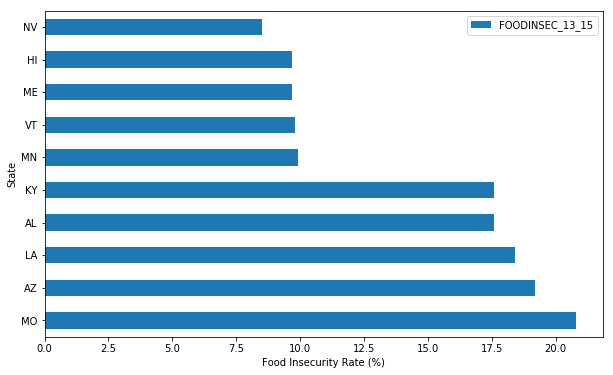

In [380]:
insecurity_table =  pd.concat([high_insecure, low_insecure], axis=0)
ax = insecurity_table.plot(kind = 'barh',x='State', figsize=(10,6),width = 0.5)
ax.set_xlabel('Food Insecurity Rate (%)')
plt.savefig("insecurity_combined.pdf")

### Now that I've filterd out the 5 most food insecure state and most food secure state, I'd like to compare these two groups by other indicators in order to see what's the key driving factor behind the food environment severity

-  ***Household access to grocery stores ( measured by physical distance between households and grocery stores)***
    
     - ***Low Access indicator:*** percentage of population  in a county living more than 1 mile from a supermarket or large grocery store if in an urban area, or more than 10 miles from a supermarket or large grocery store if in a rural area.
    
-  ***Food Choice***

     - ***Expenditure on Fastfood vs Full Service Restaurant***
     - ***Change in number of FFR vs FSR overtime
    
-  ***Income Level***
     - ***Poverty Rate***
     - ***Median Household Income***
    
    

## Indicator 1: Does Physical Distance from Households to Grocery Stores Prevent People from Getting Proper Access to Staple Food?

In [153]:
tenstate = highinsec_state+lowinsec_state

In [154]:
ten_states = big_table[big_table.State.isin(tenstate)]

In [158]:
ten_states.head()

,FIPS,State,County,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,...,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,PCT_HSPA15,RECFAC09,RECFAC14,PCH_RECFAC_09_14,RECFACPTH09,RECFACPTH14,PCH_RECFACPTH_09_14
0,1001,AL,Autauga,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,13.0,31.5,34.1,25.4,4,5,25.000000,0.073889,0.090261,22.156783
1,1003,AL,Baldwin,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,10.4,26.2,27.4,25.4,18,25,38.888889,0.100331,0.124931,24.518392
2,1005,AL,Barbour,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,18.4,37.6,44.4,25.4,1,0,-100.000000,0.036157,0.000000,-100.000000
3,1007,AL,Bibb,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,14.8,32.3,40.3,25.4,1,1,0.000000,0.043590,0.044433,1.932818
4,1009,AL,Blount,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,...,14.1,31.9,34.6,25.4,3,3,0.000000,0.052319,0.051976,-0.654897


In [226]:
df1 = ten_states.groupby('State').FOODINSEC_13_15.mean().reset_index()

df1

,State,FOODINSEC_13_15
0,AL,17.6
1,AZ,19.2
2,HI,9.7
3,KY,17.6
4,LA,18.4
5,ME,9.7
6,MN,9.9
7,MO,20.8
8,NV,8.5
9,VT,9.8


In [227]:
df2 = ten_states.groupby('State').PCT_LACCESS_POP15.mean().round(2).reset_index()
df2

,State,PCT_LACCESS_POP15
0,AL,16.17
1,AZ,36.37
2,HI,26.21
3,KY,11.38
4,LA,22.95
5,ME,9.95
6,MN,24.45
7,MO,20.60
8,NV,40.68
9,VT,10.36


### It seems from the data that there's no strong correlation between high food insecurity rate and the physical distance between household and grocery store, and my main challenge here is how to visualize this finding.

### The scatter plot below seems lack of point and clarity, but the bar chart doesn't seem to do any better job...

In [228]:
small_table = pd.merge(df1,df2,on='State')
small_table

,State,FOODINSEC_13_15,PCT_LACCESS_POP15
0,AL,17.6,16.17
1,AZ,19.2,36.37
2,HI,9.7,26.21
3,KY,17.6,11.38
4,LA,18.4,22.95
5,ME,9.7,9.95
6,MN,9.9,24.45
7,MO,20.8,20.60
8,NV,8.5,40.68
9,VT,9.8,10.36


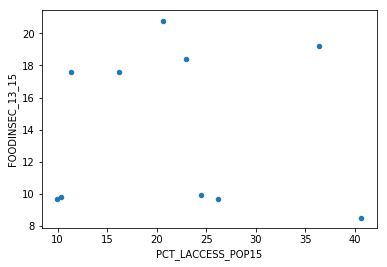

In [381]:

small_table.plot(kind = 'scatter',x='PCT_LACCESS_POP15',y='FOODINSEC_13_15')
plt.savefig("scatter.pdf")

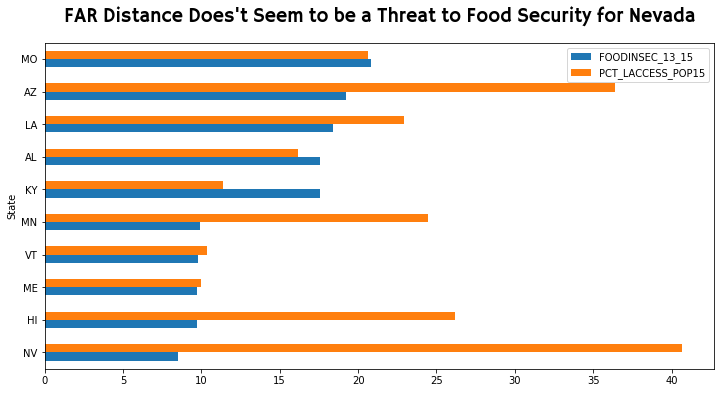

In [391]:

ax = small_table.sort_values(by='FOODINSEC_13_15').plot(kind = 'barh',x='State',y=['FOODINSEC_13_15','PCT_LACCESS_POP15'],figsize=(12,6))
ax.set_title('FAR Distance Does\'t Seem to be a Threat to Food Security for Nevada',pad = 20)
ax.title.set_fontsize(20)
ax.title.set_fontname('Hammersmith One')


plt.savefig("distance_vs_insecurity.png")





### Major Finding:
-  ***The distance betweeen household and grocery store didn't seem like a key factor causing high/low food security in these 10 states. For the top 5 food insecire states, the percentage of population that lives with low access to grocery store are below 25% except Arizona. For the top 5 food secure states, three of them has exceptionally high population lives far away from grocery stores. ***

In [40]:
#Another Approach that I decided to put asaide
df_access = df_access[['FIPS','State','County','PCT_LACCESS_POP15']]
highinsec_access = df_access[df_access.State.isin(highinsec_state)]
lowinsec_access =  df_access[df_access.State.isin(lowinsec_state)]


In [ ]:
highinsec_access.groupby('State').PCT_LACCESS_POP15.mean().round(2).sort_values().plot(kind = 'barh')

In [ ]:
lowinsec_access.groupby('State').PCT_LACCESS_POP15.mean().round(2).plot(kind='barh')

## Indicator 2:  Food Choice
-   *** Do people spend more on fastfood or full-service restaurants in these 10 states?***
-   ***Which kind of food choice are more available and accessible in the neighhood? Fastfood or Full-service? Is there a tendency that fastfood chains are more likely to open stores in highly food insecure neighborhood?***

In [47]:
df_food.head()

,FIPS,State,County,FFR09,FFR14,PCH_FFR_09_14,FFRPTH09,FFRPTH14,PCH_FFRPTH_09_14,FSR09,FSR14,PCH_FSR_09_14,FSRPTH09,FSRPTH14,PCH_FSRPTH_09_14,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
0,1001,AL,Autauga,30,36,20.000000,0.554170,0.649878,17.270512,34,29,-14.705882,0.628059,0.523513,-16.645960,649.511367,674.80272,484.381507,512.280987
1,1003,AL,Baldwin,112,132,17.857143,0.624282,0.659634,5.662750,202,221,9.405941,1.125938,1.104387,-1.914027,649.511367,674.80272,484.381507,512.280987
2,1005,AL,Barbour,21,22,4.761905,0.759301,0.818239,7.762116,12,15,25.000000,0.433887,0.557890,28.579797,649.511367,674.80272,484.381507,512.280987
3,1007,AL,Bibb,7,5,-28.571429,0.305131,0.222163,-27.190844,6,5,-16.666667,0.261540,0.222163,-15.055985,649.511367,674.80272,484.381507,512.280987
4,1009,AL,Blount,24,21,-12.500000,0.418549,0.363832,-13.073035,19,15,-21.052632,0.331351,0.259880,-21.569656,649.511367,674.80272,484.381507,512.280987


In [217]:
highinsec_food = df_food[df_food.State.isin(highinsec_state)]

lowinsec_food =  df_food[df_food.State.isin(lowinsec_state)]

In [281]:
df1 = highinsec_food.groupby('State').FFR09.sum().reset_index()
df1

df2 = highinsec_food.groupby('State').FFR14.sum().reset_index()
df2



df3 = highinsec_food.groupby('State').FSR09.sum().reset_index()
df4 = highinsec_food.groupby('State').FSR14.sum().reset_index()

df5=highinsec_food.groupby('State').PC_FFRSALES07.mean().reset_index()
df6= highinsec_food.groupby('State').PC_FFRSALES12.mean().reset_index()

df7=highinsec_food.groupby('State').PC_FSRSALES07.mean().reset_index()
df8= highinsec_food.groupby('State').PC_FSRSALES12.mean().reset_index()

dfs=[df1,df2,df3,df4,df5,df6,df7,df8]
df = pd.concat(dfs, axis=1)


In [282]:
#drop duplicate State column
food_insec = df.loc[:, ~df.columns.duplicated()]


food_insec

,State,FFR09,FFR14,FSR09,FSR14,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
0,AL,3322,3561,2759,2777,649.511367,674.802720,484.381507,512.280987
1,AZ,4071,4211,3799,4053,760.500461,577.718809,758.628372,623.588015
2,KY,2896,3133,2510,2640,666.234513,677.731961,534.383583,573.685136
3,LA,2927,3268,2630,2793,630.503498,650.723556,522.883766,633.085868
4,MO,3964,4041,4399,4569,623.520543,567.295463,617.339007,642.525664


In [ ]:
# fig, ax = plt.subplots()

# food_insec.groupby('State').plot(x=['year09','year14'],y=['FSR09','FSR14'],ax=ax)




In [375]:
df1 = lowinsec_food.groupby('State').FFR09.sum().reset_index()

df2 = lowinsec_food.groupby('State').FFR14.sum().reset_index()




df3 = lowinsec_food.groupby('State').FSR09.sum().reset_index()
df4 = lowinsec_food.groupby('State').FSR14.sum().reset_index()

df5=lowinsec_food.groupby('State').PC_FFRSALES07.mean().reset_index()
df6= lowinsec_food.groupby('State').PC_FFRSALES12.mean().reset_index()

df7=lowinsec_food.groupby('State').PC_FSRSALES07.mean().reset_index()
df8= lowinsec_food.groupby('State').PC_FSRSALES12.mean().reset_index()

dfs=[df1,df2,df3,df4,df5,df6,df7,df8]
df = pd.concat(dfs, axis=1)

food_sec = df.loc[:, ~df.columns.duplicated()]
food_sec.to_csv('sample.csv',index=False)

## Challenge: Which visualization is better? Bar chart or pie chart?
***my concern with bar chart is that i've used it many times during this project, using pie chart seems to diversify the visualization a little bit. On the other hand, I was worried that is 10 pie charts too many?

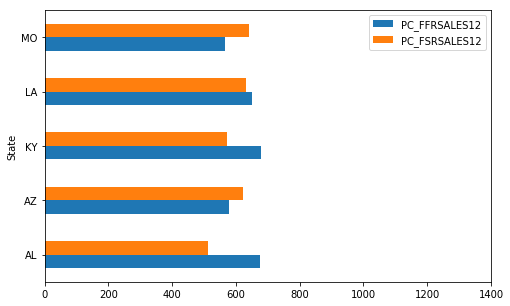

In [383]:
ax = food_insec.plot(x='State',y=['PC_FFRSALES12','PC_FSRSALES12'],kind = 'barh', figsize=(8,5))
ax.set_xlim((0, 1400))
plt.savefig("bar_food_insecure.pdf")

In [325]:
food_insec.PC_FFRSALES12.iloc[0]

674.8027203993412

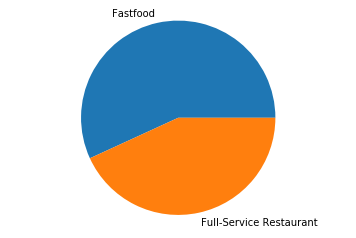

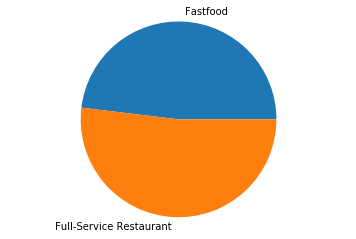

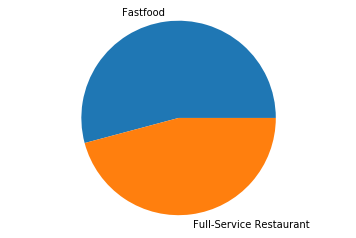

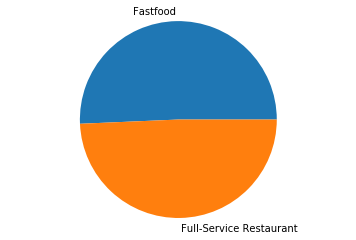

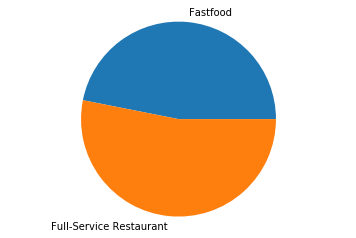

In [372]:
for i in range(5):
    plt.pie([food_insec.PC_FFRSALES12.iloc[i], food_insec.PC_FSRSALES12.iloc[i]],labels = ['Fastfood','Full-Service Restaurant'])
    plt.axis('equal')
    plt.title = food_insec.State.iloc[i]
    
    plt.savefig("pie_"+str(food_insec.State.iloc[i])+'.pdf')
    plt.show()

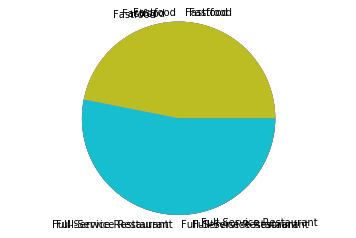

In [369]:
for i in range(5):
    plt.pie([food_insec.PC_FFRSALES12.iloc[i], food_insec.PC_FSRSALES12.iloc[i]],labels = ['Fastfood','Full-Service Restaurant'])
    plt.axis('equal')
    plt.title = food_sec.State.iloc[i]
    
    plt.savefig("pie_"+str(food_sec.State.iloc[i])+'.pdf')

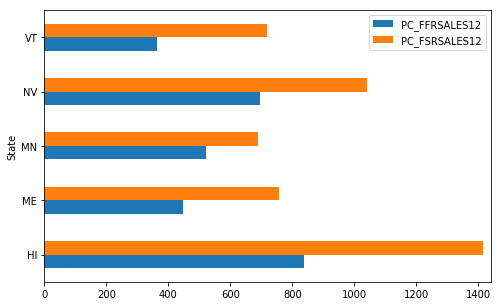

In [384]:
ax= food_sec.plot(x='State',y=['PC_FFRSALES12','PC_FSRSALES12'],figsize=(8,5),kind = 'barh')
ax.set_xlim((0, 1440))
plt.savefig("bar_food_secure.pdf")

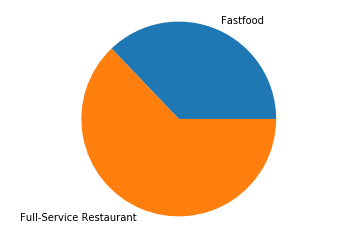

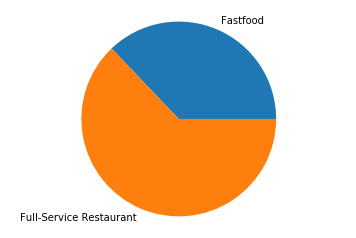

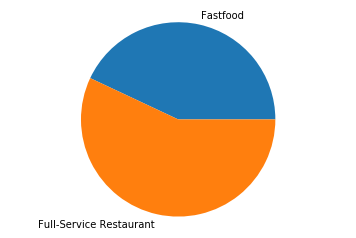

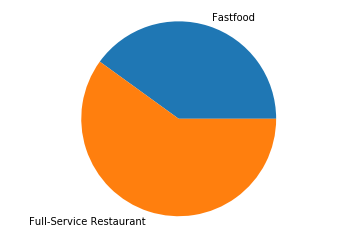

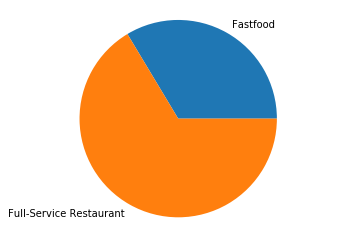

In [374]:
for i in range(5):
    plt.pie([food_sec.PC_FFRSALES12.iloc[i], food_sec.PC_FSRSALES12.iloc[i]],labels = ['Fastfood','Full-Service Restaurant'])
    plt.axis('equal')
    plt.title = food_sec.State.iloc[i]
    
    plt.savefig("pie_"+str(food_sec.State.iloc[i])+'.pdf')
    plt.show()



In [27]:
df_econ.head()

,FIPS,State,County,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
0,1001,AL,Autauga,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,0,18.8,0,1,0.0
1,1003,AL,Baldwin,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,0,19.6,0,1,0.0
2,1005,AL,Barbour,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,1,45.2,1,0,0.0
3,1007,AL,Bibb,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,0,29.3,1,1,0.0
4,1009,AL,Blount,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,0,22.2,0,1,0.0
